In [1]:
import matplotlib
matplotlib.rcParams['font.family'] = 'SimHei'  # 设置为黑体，支持中文显示
matplotlib.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

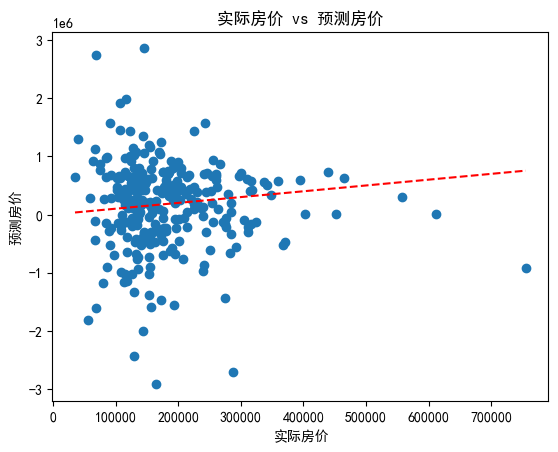

In [6]:
# 导入必要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor  # 使用SGDRegressor代替LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# 加载训练数据集
train_df = pd.read_csv('data/train.csv')

# 查看数据集的基本信息
print(train_df.info())

# 查看数据集的前几行
print(train_df.head())

# 处理缺失值
# 分离数值特征和类别特征
num_cols = train_df.select_dtypes(include=['float64', 'int64']).columns  # 数值特征
cat_cols = train_df.select_dtypes(include=['object']).columns  # 类别特征

# 数值特征使用中位数填充
train_df[num_cols] = train_df[num_cols].fillna(train_df[num_cols].median())

# 类别特征使用众数填充
for col in cat_cols:
    train_df[col] = train_df[col].fillna(train_df[col].mode()[0])

# 确认缺失值已处理
print(train_df.isnull().sum())

# 将类别特征进行 One-Hot 编码
train_df = pd.get_dummies(train_df)

# 特征与目标变量分开
X = train_df.drop('SalePrice', axis=1)
y = train_df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 初始化并训练随机梯度下降回归模型（SGDRegressor）
model = SGDRegressor(max_iter=10000, tol=1e-3, random_state=42)  # 设置训练的最大轮次max_iter

# 训练模型
model.fit(X_train, y_train)

# 用测试集进行预测
y_pred = model.predict(X_test)

# 评估模型的性能
mse = mean_squared_error(y_test, y_pred)  # 均方误差
r2 = r2_score(y_test, y_pred)  # 决定系数 (R^2)

# 输出结果
print(f"均方误差 (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# 输出预测结果和实际值对比
for i in range(10):  # 打印前10个预测值和实际值对比
    print(f"实际房价: {y_test.iloc[i]}, 预测房价: {y_pred[i]:.2f}")

# 绘制真实值与预测值的对比图
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # 添加理想线
plt.xlabel("实际房价")
plt.ylabel("预测房价")
plt.title("实际房价 vs 预测房价")
plt.show()


In [5]:
# 加载测试数据集
test_df = pd.read_csv('data/test.csv')

# 进行相同的预处理
# 处理缺失值
# 填充数值列
num_cols = num_cols[num_cols != 'SalePrice']
test_df[num_cols] = test_df[num_cols].fillna(test_df[num_cols].median())
# 填充类别列
for col in cat_cols:
    test_df[col] = test_df[col].fillna(test_df[col].mode()[0])

# 将类别特征进行 One-Hot 编码
test_df = pd.get_dummies(test_df)

# 确保测试集和训练集具有相同的列
# 对于训练集和测试集，做一个对比，确保列数一致
missing_cols = set(X.columns) - set(test_df.columns)
for col in missing_cols:
    test_df[col] = 0  # 给缺失的列添加 0 值

# 确保列的顺序与训练集一致
test_df = test_df[X.columns]

# 处理测试数据集特征的标准化（与训练数据标准化一致）
X_test_final = scaler.transform(test_df)

# 用训练好的模型进行预测
test_predictions = model.predict(X_test_final)

# 保存结果到csv文件（Kaggle格式）
submission = pd.DataFrame({'Id': test_df['Id'], 'SalePrice': test_predictions})
submission.to_csv('submission.csv', index=False)

print("预测结果已保存到 submission.csv")


预测结果已保存到 submission.csv
